# Group 6 - Aleesha, Jacob, Muhammed, Susmi

## Medical Insurance charge prediction

Imorting libraries

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import scipy.stats as st
import plotly.express as  ptly
import matplotlib.pyplot as plt
import matplotlib.pyplot as mtpy
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

Loading dataset into a data frame

Load dataset into 2 data frames. 'original_df' is created for a backup and 'med_df' is for preprocessing and modyfying

In [2]:
os.chdir('C:/Users/mshak/Desktop/AIMT/TERM 1/AML-1104 Data Science and Machine Learning in Canada/project')
original_df = pd.read_csv("insurance.csv")
med_df = pd.read_csv("insurance.csv")
med_df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Data Preprocessing and EDA

There are 1338 ros and 7 columns

In [3]:
med_df.shape

(1338, 7)

There are 7 columns with datatypes float64(2), int64(2), object(3).

In [4]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no null values in the data frame

In [5]:
med_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Describes statistical details of numerical datatypes

In [6]:
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Identifying unique values in the object datatype

In [7]:
for column in med_df.columns:
    if (med_df[column].dtype == object):
        print (column.title(), ':', med_df[column].unique())

Sex : ['female' 'male']
Smoker : ['yes' 'no']
Region : ['southwest' 'southeast' 'northwest' 'northeast']


# Data Visualization

<AxesSubplot:xlabel='age', ylabel='Count'>

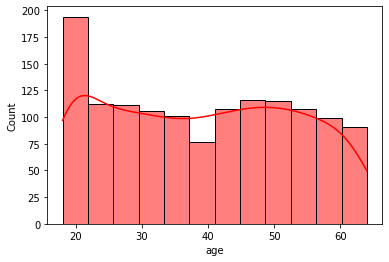

In [8]:
sns.histplot(med_df["age"],color="r",kde=True)

The highest number of people are from age 20

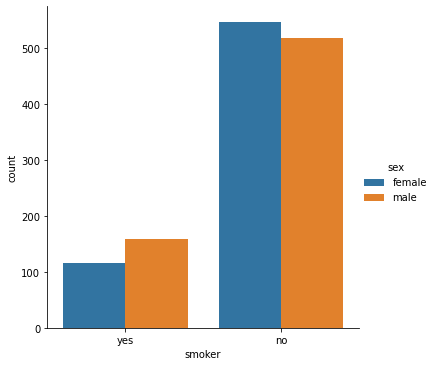

In [9]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=med_df)

Majority of the male and female are non-smokers and male smokers are higher than female smokers

<AxesSubplot:xlabel='bmi', ylabel='charges'>

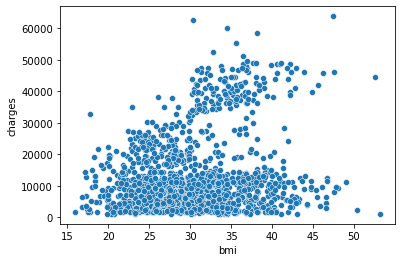

In [10]:
sns.scatterplot(x='bmi',y='charges',data=med_df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

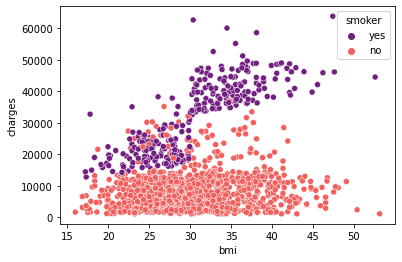

In [11]:
sns.scatterplot(x='bmi',y='charges',data=med_df,palette='magma',hue='smoker')

Non smoker with low bmi has low charges and smoker with high bmi has high charges. Most of the non smokers have low charges as shown in the plot

<AxesSubplot:xlabel='age', ylabel='charges'>

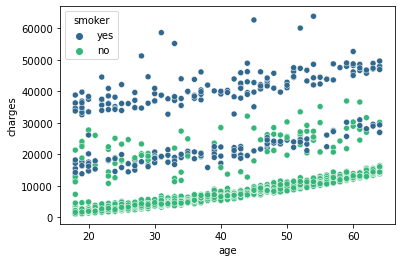

In [12]:
sns.scatterplot(x='age',y='charges',data=med_df,palette='viridis',hue='smoker')

Charges are increases when age increases and non-smoker have low charges. Most of the non-smokers charges are below 15000 and above 30000 are all smokers. Also those who smoke with older age have high charges.

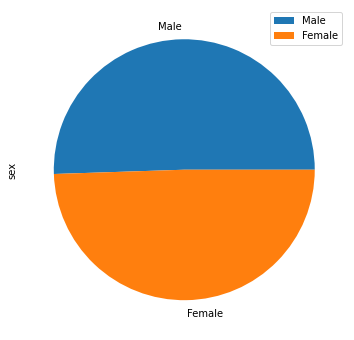

In [13]:
mtpy.figure(figsize=(10,6))
genderLabels=["Male","Female"]
med_df.sex.value_counts().plot(kind='pie',labels=genderLabels)
mtpy.legend()
mtpy.show()

Male and Female are almost equally distributed in the data frame.

<AxesSubplot:>

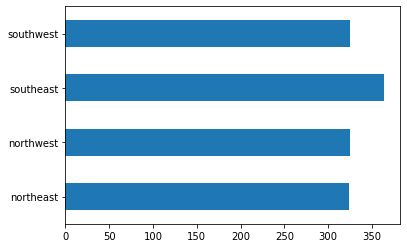

In [14]:
med_df['region'].value_counts().sort_index().plot.barh()

Southeast have more people than other regions

<AxesSubplot:xlabel='region', ylabel='charges'>

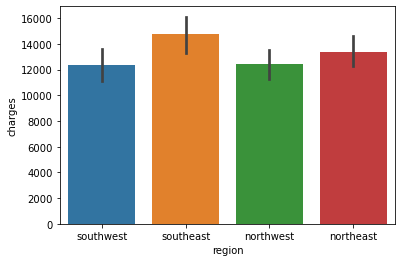

In [15]:
sns.barplot(data=med_df, x = "region", y = "charges")

The insurance charges are high on southeast region when compare to other regions and the southwest and northwest insurance charges are almost same.

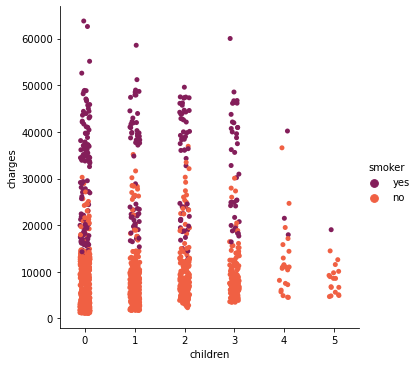

In [16]:
sns.catplot(hue="smoker", y="charges", x="children",
             data=med_df,palette='rocket')

From the above plot, we can see that when the number of children increases, the rate of charges decreases significantly, and also the number of smokers decreases when the number of children increases.

# Applying LabelEncoder on Categorical feature

First we will apply label encoding on the categorical feature unique values as we have to convert values from string to integers,where each integer represents the unique value and those integers do not represent a set order.Only after label encoding the categorical features we can apply onehot encoding on them.

In [17]:
label_encoder = LabelEncoder()
region = med_df['region']
region_encoded = label_encoder.fit_transform(region)
region_encoded

array([3, 2, 2, ..., 2, 3, 1])

In [18]:
print(region_encoded[0])
print(med_df['region'][0])
print(region_encoded[1])
print(med_df['region'][1])
print(region_encoded[3])
print(med_df['region'][3])
print(region_encoded[8])
print(med_df['region'][8])

3
southwest
2
southeast
1
northwest
0
northeast


# Applying OneHotEncoder on Label-Encoded feature

In [19]:
enc_df = OneHotEncoder(categories='auto')
region_OneHotEncoderdf = enc_df.fit_transform(region_encoded.reshape(-1,1))
region_OneHotEncoderdf_array = region_OneHotEncoderdf.toarray()
region_df = pd.DataFrame(region_OneHotEncoderdf_array, columns = ['northeast','northwest', 'southeast', 'southwest'])
region_df.head()

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


# Directly converting yes or no values into 0 and 1

In [20]:
smoker = {"smoker": {"yes": 1,"no": 0}}
med_df = med_df.replace(smoker)
med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [21]:
sex = {"sex": {"female": 1,"male": 0}}
med_df = med_df.replace(sex)
med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


Concatenating med_df and region_df into new data fraem called new_df

In [22]:
new_df = pd.concat([med_df, region_df], axis=1, verify_integrity=True)
new_df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


Removing 'region' column from new_df dataframe to avoid repeating values.

In [23]:
new_df.drop('region', inplace=True, axis=1)
new_df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,1,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,1,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,1,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


In [24]:
new_df = new_df[['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast', 'southwest', 'charges']]
new_df.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,1,27.900,0,1,0.0,0.0,0.0,1.0,16884.92400
1,18,0,33.770,1,0,0.0,0.0,1.0,0.0,1725.55230
2,28,0,33.000,3,0,0.0,0.0,1.0,0.0,4449.46200
3,33,0,22.705,0,0,0.0,1.0,0.0,0.0,21984.47061
4,32,0,28.880,0,0,0.0,1.0,0.0,0.0,3866.85520


In [25]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   northeast  1338 non-null   float64
 6   northwest  1338 non-null   float64
 7   southeast  1338 non-null   float64
 8   southwest  1338 non-null   float64
 9   charges    1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


# Observing correlation 

Original Dataframe

<AxesSubplot:>

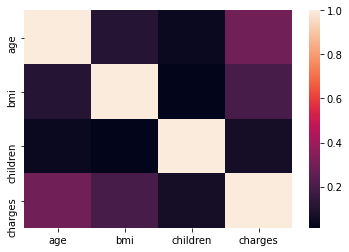

In [27]:
sns.heatmap(original_df.corr())

Dataframe after data preprocessing

<AxesSubplot:>

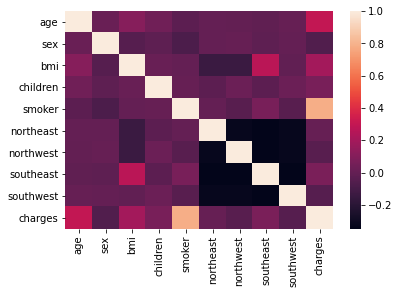

In [28]:
sns.heatmap(new_df.corr())

From above heatmap we can observe only features have high correlation among each other which is charges and smoker.We have to delete one of the features as both of them provide same info but in this case we are not as charges is the target variable and smoker feature is a predictor variable which is highly valuable in providing insights about the target variable.

# Detecting and handling Outliers

<AxesSubplot:xlabel='age'>

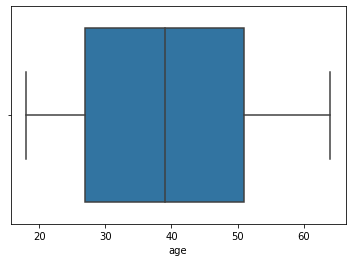

In [29]:
sns.boxplot(x=new_df['age'])


<AxesSubplot:xlabel='bmi'>

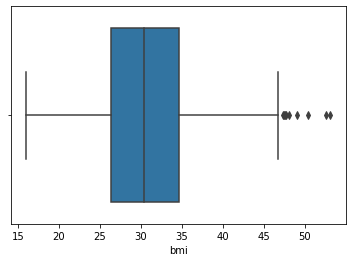

In [30]:
sns.boxplot(x=new_df['bmi'])


<AxesSubplot:xlabel='charges'>

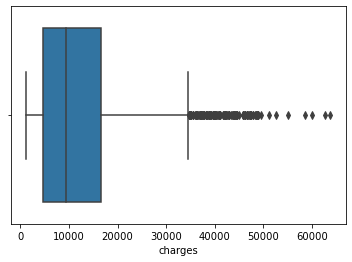

In [31]:
sns.boxplot(x=new_df['charges'])

From above boxplots we can see that we have outliers in charges and BMI columns

In [32]:
print(np.where(new_df['bmi']>42))


(array([  14,  116,  265,  286,  292,  356,  383,  401,  438,  442,  454,
        493,  521,  530,  543,  547,  549,  563,  572,  582,  627,  640,
        650,  656,  660,  674,  701,  796,  803,  811,  847,  860,  867,
        895,  930,  941,  951, 1024, 1047, 1067, 1088, 1124, 1131, 1156,
       1161, 1239, 1312, 1317, 1332], dtype=int64),)


In [33]:
new_df[new_df['bmi']>42]

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
14,27,0,42.130,0,1,0.0,0.0,1.0,0.0,39611.75770
116,58,0,49.060,0,0,0.0,0.0,1.0,0.0,11381.32540
265,46,0,42.350,3,1,0.0,0.0,1.0,0.0,46151.12450
286,46,1,48.070,2,0,1.0,0.0,0.0,0.0,9432.92530
292,25,0,45.540,2,1,0.0,0.0,1.0,0.0,42112.23560
356,46,0,43.890,3,0,0.0,0.0,1.0,0.0,8944.11510
383,35,1,43.340,2,0,0.0,0.0,1.0,0.0,5846.91760
401,47,0,47.520,1,0,0.0,0.0,1.0,0.0,8083.91980
438,52,1,46.750,5,0,0.0,0.0,1.0,0.0,12592.53450
442,18,0,43.010,0,0,0.0,0.0,1.0,0.0,1149.39590


In [34]:
new_df[new_df['charges']>35000]

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
14,27,0,42.130,0,1,0.0,0.0,1.0,0.0,39611.75770
19,30,0,35.300,0,1,0.0,0.0,0.0,1.0,36837.46700
23,34,1,31.920,1,1,1.0,0.0,0.0,0.0,37701.87680
29,31,0,36.300,2,1,0.0,0.0,0.0,1.0,38711.00000
30,22,0,35.600,0,1,0.0,0.0,0.0,1.0,35585.57600
...,...,...,...,...,...,...,...,...,...,...
1300,45,0,30.360,0,1,0.0,0.0,1.0,0.0,62592.87309
1301,62,0,30.875,3,1,0.0,1.0,0.0,0.0,46718.16325
1303,43,0,27.800,0,1,0.0,0.0,0.0,1.0,37829.72420
1313,19,1,34.700,2,1,0.0,0.0,0.0,1.0,36397.57600


In [35]:
index = np.where((new_df['bmi']>42) | (new_df['charges']>35000))

In [36]:
new_df.loc[index]

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
14,27,0,42.13,0,1,0.0,0.0,1.0,0.0,39611.7577
19,30,0,35.30,0,1,0.0,0.0,0.0,1.0,36837.4670
23,34,1,31.92,1,1,1.0,0.0,0.0,0.0,37701.8768
29,31,0,36.30,2,1,0.0,0.0,0.0,1.0,38711.0000
30,22,0,35.60,0,1,0.0,0.0,0.0,1.0,35585.5760
...,...,...,...,...,...,...,...,...,...,...
1312,34,0,42.90,1,0,0.0,0.0,0.0,1.0,4536.2590
1313,19,1,34.70,2,1,0.0,0.0,0.0,1.0,36397.5760
1317,18,0,53.13,0,0,0.0,0.0,1.0,0.0,1163.4627
1323,42,1,40.37,2,1,0.0,0.0,1.0,0.0,43896.3763


In [37]:
new_df.loc[index].count()

age          169
sex          169
bmi          169
children     169
smoker       169
northeast    169
northwest    169
southeast    169
southwest    169
charges      169
dtype: int64

In [38]:
new_df[new_df['bmi']>42].count()

age          49
sex          49
bmi          49
children     49
smoker       49
northeast    49
northwest    49
southeast    49
southwest    49
charges      49
dtype: int64

In [39]:
new_df[new_df['charges']>35000].count()

age          133
sex          133
bmi          133
children     133
smoker       133
northeast    133
northwest    133
southeast    133
southwest    133
charges      133
dtype: int64

Avoiding outliers in BMI columns (BMI values gretaer than 42) and creating a new dataframe

In [40]:
new_df1 = new_df[new_df.bmi <42]

In [41]:
new_df1[new_df1.bmi >42]

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges


In [42]:
new_df[new_df.bmi >42]

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
14,27,0,42.130,0,1,0.0,0.0,1.0,0.0,39611.75770
116,58,0,49.060,0,0,0.0,0.0,1.0,0.0,11381.32540
265,46,0,42.350,3,1,0.0,0.0,1.0,0.0,46151.12450
286,46,1,48.070,2,0,1.0,0.0,0.0,0.0,9432.92530
292,25,0,45.540,2,1,0.0,0.0,1.0,0.0,42112.23560
356,46,0,43.890,3,0,0.0,0.0,1.0,0.0,8944.11510
383,35,1,43.340,2,0,0.0,0.0,1.0,0.0,5846.91760
401,47,0,47.520,1,0,0.0,0.0,1.0,0.0,8083.91980
438,52,1,46.750,5,0,0.0,0.0,1.0,0.0,12592.53450
442,18,0,43.010,0,0,0.0,0.0,1.0,0.0,1149.39590


Analysing the updated dataframe

In [43]:
new_df1.shape

(1289, 10)

In [44]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1289 non-null   int64  
 1   sex        1289 non-null   int64  
 2   bmi        1289 non-null   float64
 3   children   1289 non-null   int64  
 4   smoker     1289 non-null   int64  
 5   northeast  1289 non-null   float64
 6   northwest  1289 non-null   float64
 7   southeast  1289 non-null   float64
 8   southwest  1289 non-null   float64
 9   charges    1289 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 110.8 KB


In [45]:
new_df1.describe()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
count,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000
mean,39.221877,0.497285,30.119112,1.083786,0.202483,0.248254,0.251358,0.256012,0.244375,13114.773082
std,14.100310,0.500187,5.499525,1.203950,0.402006,0.432168,0.433962,0.436598,0.429883,11835.338313
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4719.736550
50%,39.000000,0.000000,30.115000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9361.326800
75%,51.000000,1.000000,34.100000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,16586.497710
max,64.000000,1.000000,41.910000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62592.873090


#  Assigning target variable and independant variables from dataset 

In [46]:
new_dfX = new_df1.iloc[: ,0:9]
new_dfy = new_df1.iloc[: ,9:10]

In [47]:
new_dfX.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,0.0,1.0,0.0,0.0


In [48]:
new_dfy.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


### Splitting data for training and testing

In [49]:
new_dfX_train, new_dfX_test, new_dfy_train, new_dfy_test = train_test_split(new_dfX, new_dfy, test_size = 0.2, random_state = 25)

# Creating Models for predicting the medical insurance cost

## Linear Regression

In [50]:
linearReg=LinearRegression()

In [51]:
linearReg.fit(new_dfX_train,new_dfy_train)

LinearRegression()

We will be evaluating our models using r2 , MSE, MAE evaluation metrics to determine which model is better among the three

## Evaluating the LinearRegression model

### R2

In [52]:
lr_r2 = r2_score(linearReg.predict(new_dfX_train),new_dfy_train)
lr_r2

0.6773580714480192

### MSE

In [53]:
lr_mse = mean_squared_error(linearReg.predict(new_dfX_train),new_dfy_train)
lr_mse

34186865.749876104

### MAE

In [54]:
lr_mae = mean_absolute_error(new_dfy_train, linearReg.predict(new_dfX_train))
lr_mae

4154.931696885718

## Random Forest

In [55]:
randomFor=RandomForestRegressor(max_depth=10,min_samples_leaf=15,n_jobs=20)

In [56]:
randomFor.fit(new_dfX_train,new_dfy_train)

<ipython-input-56-9303542e5db6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomFor.fit(new_dfX_train,new_dfy_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=15, n_jobs=20)

## Evaluating the RandomForest model

### R2

In [57]:
rf_r2 = r2_score(randomFor.predict(new_dfX_train),new_dfy_train)
rf_r2

0.8620214107925129

### MSE

In [58]:
rf_mse = mean_squared_error(randomFor.predict(new_dfX_train),new_dfy_train)
rf_mse

16671213.836569156

### MAE

In [59]:
rf_mae = mean_absolute_error(new_dfy_train, randomFor.predict(new_dfX_train))
rf_mae

2315.861136239069

## Decision Tree

In [60]:
decisionTree=DecisionTreeRegressor(max_depth=6,min_samples_leaf=10)

In [61]:
decisionTree.fit(new_dfX_train,new_dfy_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=10)

## Evaluating the DecisionTree model

### R2

In [62]:
dt_r2 = r2_score(decisionTree.predict(new_dfX_train),new_dfy_train)
dt_r2

0.8705186641213308

### MSE

In [63]:
dt_mse = mean_squared_error(decisionTree.predict(new_dfX_train),new_dfy_train)
dt_mse

16066041.342196248

### MAE

In [64]:
dt_mae = mean_absolute_error(new_dfy_train, decisionTree.predict(new_dfX_train))
dt_mae

2262.957164431337

### R Squared value of the models

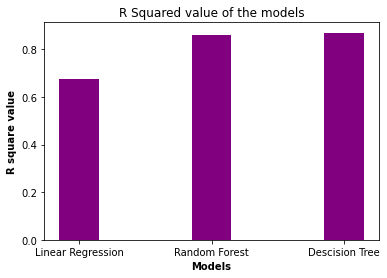

In [65]:
x = ['Linear Regression','Random Forest', 'Descision Tree']
y = [lr_r2,rf_r2,dt_r2]
plt.bar(x, y, width = .3, color="purple")
plt.title('R Squared value of the models')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('R square value', fontweight='bold')
plt.show()

Based on r2_Score Decision tree model has the highest score with 0.87

### Mean Sqaured Error (MSE) value of the models

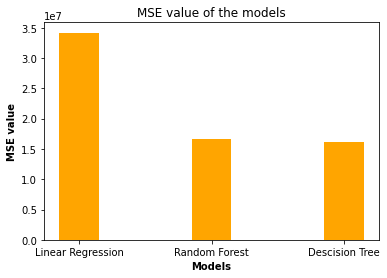

In [66]:
x = ['Linear Regression','Random Forest', 'Descision Tree']
y = [lr_mse,rf_mse,dt_mse]
plt.bar(x, y, width = .3, color="orange")
plt.title('MSE value of the models')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('MSE value', fontweight='bold')
plt.show()

Based on MSE (Mean Squared Error) Linear Regression model has the lowest mean square error rate with 34186865.749876104

### Mean Absolute Error (MAE) value of the models

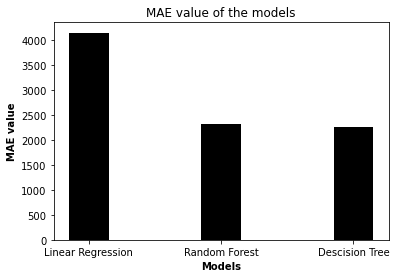

In [67]:
x = ['Linear Regression','Random Forest', 'Descision Tree']
y = [lr_mae,rf_mae,dt_mae]
plt.bar(x, y, width = .3, color="black")
plt.title('MAE value of the models')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('MAE value', fontweight='bold')
plt.show()

Based on MAE (Mean Absolute Error) Decision Tree model has the lowest mean absolute error value with 2262.957164431337


## Based on the 3 evaluation metrics Decision Tree model scored better on 2 of the metrics hence we can consider the decision tree model for our use case of predicting the medical insurance cost